In [1]:
import pandas as pd

train_df = pd.read_csv("dev_anon_split/r2_co_train_statements.csv", sep=';')
test_df = pd.read_csv("dev_anon_split/r2_co_test_statements.csv", sep=';')

train_df = train_df[['Text', 'Polarity']]
test_df = test_df[['Text', 'Polarity']]

display(train_df)
display(test_df)


,Text,Polarity
0,Governo Doria compra 46 milhões de doses da va...,for
1,A vacina chinesa já foi aplicada nos cidadãos ...,against
2,O lance da vacina chinesa é simples de resolve...,against
3,João Dória está chamando a 'vacina chinesa' de...,against
4,Datena: A China vai vacinar os chineses? Doria...,against
...,...,...
5974,Coronavac se injeta logo em mim eu tenho que i...,for
5975,Escancarando a Seletividade da Imprensa (milit...,against
5976,"Apesar das criticas, governo federal inclui Co...",for
5977,Esperando aqui para ver se a Chanceler Ângela ...,against


,Text,Polarity
0,A TV está mostrando especialistas apresentando...,for
1,Cadastrei meu pai toda feliz no site do govern...,for
2,"Gado não precisa de vacina da China, eles toma...",for
3,DOSSIÊ - DORIA E A VACINA CHINESA via,against
4,A CoronaVac é desenvolvida pelo Instituto Buta...,for
...,...,...
1989,Para quem ainda não entendeu a alegria do suce...,for
1990,Anvisa suspendeu os testes com a Coronavac sim...,for
1991,"As vacinas, objetos dos acordos de compra e tr...",for
1992,E desde quando uma vacina que oferece 78% de c...,against


In [2]:
print("\nPolarity distribution in training set:")
print(train_df['Polarity'].value_counts())

print("\nPolarity distribution in test set:") 
print(test_df['Polarity'].value_counts())


Polarity distribution in training set:
Polarity
against    3043
for        2936
Name: count, dtype: int64

Polarity distribution in test set:
Polarity
against    1015
for         979
Name: count, dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['Polarity'])
test_df['label'] = label_encoder.transform(test_df['Polarity'])

label2id = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label2id = {k: str(v) for k, v in label2id.items()}
id2label = {v: str(k) for k, v in label2id.items()}
display(train_df)
display(test_df)
display(label2id)
display(id2label)

,Text,Polarity,label
0,Governo Doria compra 46 milhões de doses da va...,for,1
1,A vacina chinesa já foi aplicada nos cidadãos ...,against,0
2,O lance da vacina chinesa é simples de resolve...,against,0
3,João Dória está chamando a 'vacina chinesa' de...,against,0
4,Datena: A China vai vacinar os chineses? Doria...,against,0
...,...,...,...
5974,Coronavac se injeta logo em mim eu tenho que i...,for,1
5975,Escancarando a Seletividade da Imprensa (milit...,against,0
5976,"Apesar das criticas, governo federal inclui Co...",for,1
5977,Esperando aqui para ver se a Chanceler Ângela ...,against,0


,Text,Polarity,label
0,A TV está mostrando especialistas apresentando...,for,1
1,Cadastrei meu pai toda feliz no site do govern...,for,1
2,"Gado não precisa de vacina da China, eles toma...",for,1
3,DOSSIÊ - DORIA E A VACINA CHINESA via,against,0
4,A CoronaVac é desenvolvida pelo Instituto Buta...,for,1
...,...,...,...
1989,Para quem ainda não entendeu a alegria do suce...,for,1
1990,Anvisa suspendeu os testes com a Coronavac sim...,for,1
1991,"As vacinas, objetos dos acordos de compra e tr...",for,1
1992,E desde quando uma vacina que oferece 78% de c...,against,0


{'against': '0', 'for': '1'}

{'0': 'against', '1': 'for'}

/home/aluisioamorim/Code/ModernBERTbr/modernBERTbr/.venv/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Train token length stats:
count    5979.000000
mean       42.209400
std        20.799686
min         6.000000
25%        25.000000
50%        40.000000
75%        58.000000
max       153.000000
Name: Text, dtype: float64

Test token length stats:
count    1994.000000
mean       42.786861
std        20.840642
min         5.000000
25%        25.000000
50%        41.000000
75%        59.000000
max       161.000000
Name: Text, dtype: float64

Suggested max_length (95th percentile): 74


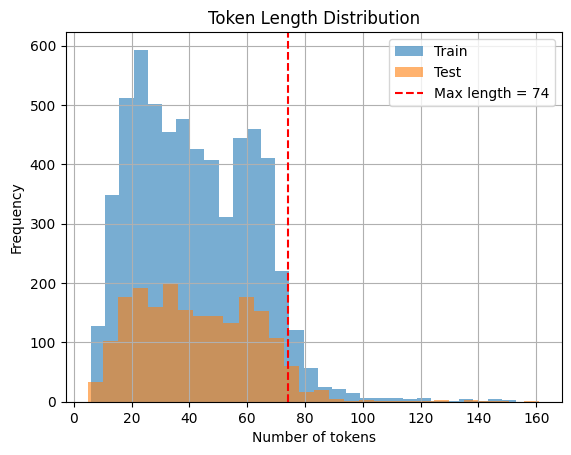

In [4]:
from datasets import Dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

train_dataset = Dataset.from_pandas(train_df[['Text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['Text', 'label']])

tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

train_token_lengths = train_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))
test_token_lengths = test_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))

print("Train token length stats:")
print(train_token_lengths.describe())
print("\nTest token length stats:")
print(test_token_lengths.describe())

suggested_max_len = int(train_token_lengths.quantile(0.95))
print(f"\nSuggested max_length (95th percentile): {suggested_max_len}")

plt.hist(train_token_lengths, bins=30, alpha=0.6, label='Train')
plt.hist(test_token_lengths, bins=30, alpha=0.6, label='Test')
plt.axvline(suggested_max_len, color='red', linestyle='--', label=f'Max length = {suggested_max_len}')
plt.title("Token Length Distribution")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def tokenize_function(example):
    return tokenizer(example['Text'], truncation=True, padding='max_length', max_length=74)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map: 100%|██████████| 1994/1994 [00:00<00:00, 38159.79 examples/s]


In [6]:
from transformers.models.modernbert import ModernBertForSequenceClassification

model = ModernBertForSequenceClassification.from_pretrained(
    './modernbert-br/checkpoint-60000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at ./modernbert-br/checkpoint-60000 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1325878/2673190351.py:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.751300
20,0.715700
30,0.663200
40,0.656800
50,0.620600
60,0.646000
70,0.604500
80,0.628500
90,0.619800
100,0.564000


TrainOutput(global_step=282, training_loss=0.570066640563045, metrics={'train_runtime': 71.4083, 'train_samples_per_second': 251.189, 'train_steps_per_second': 3.949, 'total_flos': 883400073857784.0, 'train_loss': 0.570066640563045, 'epoch': 3.0})

In [8]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))



Accuracy: 0.7011

Classification Report:
              precision    recall  f1-score   support

     against       0.70      0.72      0.71      1015
         for       0.70      0.68      0.69       979

    accuracy                           0.70      1994
   macro avg       0.70      0.70      0.70      1994
weighted avg       0.70      0.70      0.70      1994



In [9]:
from transformers.models.bert import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    './bert-br/checkpoint-75000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./bert-br/checkpoint-75000 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1325878/2673190351.py:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.674000
20,0.613400
30,0.581900
40,0.576000
50,0.559500
60,0.584100
70,0.506600
80,0.531500
90,0.528200
100,0.459200


TrainOutput(global_step=282, training_loss=0.4477877917019188, metrics={'train_runtime': 50.6925, 'train_samples_per_second': 353.839, 'train_steps_per_second': 5.563, 'total_flos': 682104105467640.0, 'train_loss': 0.4477877917019188, 'epoch': 3.0})

In [ ]:
# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))


Accuracy: 0.7969

Classification Report:
              precision    recall  f1-score   support

     against       0.84      0.74      0.79      1015
         for       0.76      0.85      0.80       979

    accuracy                           0.80      1994
   macro avg       0.80      0.80      0.80      1994
weighted avg       0.80      0.80      0.80      1994



: 